In [1]:
'''
En esta red trato de clasificar jugadores rookies de la nba segun sus estadisticas e intentar predecir si
van a estar mas o menos de 5 años jugando en la nba, es decir, un si o no a >=5 años.

A pesar de probar varios modelos, y cambiar varias opciones de la red(batchsize, epocas....), no he conseguido alcanzar mas alla de
un 40-50%

adjunto el archivo csv original sin modificar, con nombres de jugadores y que es cada columna
'''

import pandas as pd
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
from sklearn.model_selection import train_test_split

path = "nba_logreg.csv"
data = pd.read_csv(path,header=None)
data.shape
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [2]:
normD=(data-data.min())/(data.max()-data.min())

train, test = train_test_split(normD, test_size=0.2)
Xtrain=train.loc[:,:18]
Ytrain=train.loc[:,19]
Xtest=test.loc[:,:18]
Ytest=test.loc[:,19]
Xtrain.head()
Xtrain

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
904,1.000000,0.367725,0.178182,0.202020,0.184211,0.599198,0.000000,0.000000,0.000,0.129870,0.137255,0.703,0.358491,0.265957,0.316176,0.037736,0.16,0.153846,0.162791
1053,0.830986,0.161376,0.047273,0.050505,0.042105,0.498998,0.000000,0.000000,1.000,0.051948,0.049020,0.703,0.207547,0.095745,0.139706,0.028302,0.04,0.025641,0.069767
362,0.957746,0.481481,0.309091,0.353535,0.357895,0.521042,0.043478,0.015385,0.364,0.207792,0.205882,0.734,0.283019,0.180851,0.227941,0.330189,0.64,0.076923,0.465116
1022,0.140845,0.113757,0.112727,0.090909,0.126316,0.288577,0.304348,0.292308,0.385,0.077922,0.058824,0.923,0.018868,0.021277,0.014706,0.113208,0.08,0.000000,0.093023
656,0.436620,0.219577,0.156364,0.161616,0.168421,0.458918,0.043478,0.076923,0.261,0.129870,0.127451,0.815,0.132075,0.159574,0.154412,0.047170,0.12,0.051282,0.139535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,0.957746,0.391534,0.207273,0.212121,0.247368,0.408818,0.000000,0.000000,0.000,0.194805,0.245098,0.595,0.396226,0.234043,0.308824,0.056604,0.24,0.128205,0.232558
205,1.000000,0.359788,0.163636,0.161616,0.194737,0.364729,0.304348,0.292308,0.359,0.090909,0.078431,0.884,0.037736,0.074468,0.058824,0.349057,0.32,0.000000,0.162791
260,0.535211,0.232804,0.167273,0.202020,0.226316,0.416834,0.000000,0.015385,0.000,0.103896,0.107843,0.722,0.037736,0.021277,0.022059,0.113208,0.16,0.000000,0.209302
294,0.774648,0.293651,0.134545,0.121212,0.121053,0.466934,0.000000,0.000000,0.000,0.181818,0.205882,0.693,0.207547,0.180851,0.191176,0.075472,0.24,0.051282,0.139535


In [10]:
model = Sequential()
''''''
model.add(Dense(60, input_dim=19, kernel_initializer='uniform', activation='relu'))
model.add(Dense(30, kernel_initializer='uniform', activation='relu'))
#model.add(Dense(50, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

'''
model.add(Dense(12, input_dim=19, kernel_initializer='uniform', activation='relu'))
model.add(Dense(24, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
'''
'''
model.add(Dense(48, input_dim=19, kernel_initializer='uniform', activation='relu'))
model.add(Dense(96, kernel_initializer='uniform', activation='relu'))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
'''
'''
model.add(Dense(128, input_dim=19, kernel_initializer='uniform', activation='relu'))
model.add(Dense(48, kernel_initializer='uniform', activation='relu'))
model.add(Dense(16, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
'''


"\nmodel.add(Dense(128, input_dim=19, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(48, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(16, kernel_initializer='uniform', activation='relu'))\nmodel.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\n"

In [11]:
#Adam=optimizers.Adam(lr=0.01)
Sgd=optimizers.SGD(lr=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=Sgd,
              metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain,
                  epochs=150,
                  batch_size=5,
                  validation_data=(Xtest, Ytest))
scores = model.evaluate(Xtest, Ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))


Epoch 1/150
215/215 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.4375 - val_loss: nan - val_accuracy: 0.3582
Epoch 2/150
215/215 [==============================] - 0s 689us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 3/150
215/215 [==============================] - 0s 654us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 4/150
215/215 [==============================] - 0s 659us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 5/150
215/215 [==============================] - 0s 710us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 6/150
215/215 [==============================] - 0s 702us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 7/150
215/215 [==============================] - 0s 646us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 8/150
215/215 [========

215/215 [==============================] - 0s 674us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 60/150
215/215 [==============================] - 0s 652us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 61/150
215/215 [==============================] - 0s 667us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 62/150
215/215 [==============================] - 0s 786us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 63/150
215/215 [==============================] - 0s 721us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 64/150
215/215 [==============================] - 0s 660us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 65/150
215/215 [==============================] - 0s 676us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 66/150
215/215 [===========

215/215 [==============================] - 0s 684us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 118/150
215/215 [==============================] - 0s 674us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 119/150
215/215 [==============================] - 0s 609us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 120/150
215/215 [==============================] - 0s 641us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 121/150
215/215 [==============================] - 0s 722us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 122/150
215/215 [==============================] - 0s 655us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 123/150
215/215 [==============================] - 0s 653us/step - loss: nan - accuracy: 0.3853 - val_loss: nan - val_accuracy: 0.3582
Epoch 124/150
215/215 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


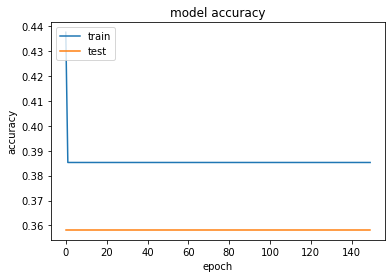

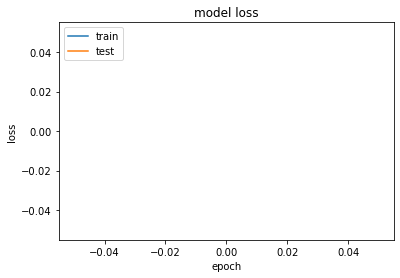

In [12]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
yval = model.predict_classes(Xtest)
print(yval)
for i in range(len(Xtest)):
    print("X {}, real: {} Predicted {}".format(Xtest.iloc[i,1:2],Ytest.iloc[i:1], yval[i]))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 

/home/mariobs/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:457: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')



X 1    0.441799
Name: 866, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.55291
Name: 1199, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.07672
Name: 313, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.391534
Name: 138, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.449735
Name: 817, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.333333
Name: 872, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.571429
Name: 705, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.198413
Name: 131, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.161376
Name: 1080, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.111111
Name: 174, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]

Name: 759, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.354497
Name: 716, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.415344
Name: 1243, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.902116
Name: 19, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.134921
Name: 483, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.314815
Name: 257, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.481481
Name: 1138, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.293651
Name: 1176, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.312169
Name: 874, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.608466
Name: 191, dtype: float64, real: Series([], Name: 19, dtype: float64) Predicted [0]
X 1    0.43386